# *Exercise*: K-means

In [1]:
import csv
import geoplotlib
from geoplotlib.utils import BoundingBox
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read-in San Francisco crime data from 1st of January 2003
crimes = {}
with open('SFPD_Incidents_-_from_1_January_2003.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for entry in reader:
        crimes[
            entry["IncidntNum"]
        ] = {
        "category":     entry["Category"],
        "weekday":      entry["DayOfWeek"],
        "date":         entry["Date"],
        "time":         entry["Time"],
        "district":     entry["PdDistrict"],
        "latitude":     entry["Y"],
        "longitude":    entry["X"]
        }

Visualize the prostitution data (e.g. by plotting it on a map)

In [3]:
# Go through the dictionary 'crimes' and get 'latitudes' and 'longitudes' values from crime category 'PROSTITUTION'
latitudes = []
longitudes = []
for key, value in crimes.iteritems():
    # Remove latitude values located wrongly at the North Pole
    if (float(crimes[key]["latitude"]) != 90) and (crimes[key]["category"] == "PROSTITUTION"):
        latitudes.append(float(crimes[key]["latitude"]))
        longitudes.append(float(crimes[key]["longitude"]))
    
# Add lists 'latitudes' and 'longitudes' to dictionary
geo_data_for_plotting = {"lat": latitudes,
                         "lon": longitudes}

# Set bounding box based on the highest and lowest latitudes/longitudes
bbox = BoundingBox(north=max(latitudes), west=min(longitudes), south=min(latitudes), east=max(longitudes))
geoplotlib.set_bbox(bbox)

# Visualize the data on a map
geoplotlib.dot(geo_data_for_plotting)
geoplotlib.inline()

* Train models of K = 2, …, 10 on the prostitution data.
* Explore how the total squared error changes as a function of K and identify what you think is the right number of clusers based on the knee-point in the squared error plot.

In [4]:
# Train models of K = 2, …, 10
k_values = []
k_errors = []
for k in range(2,11):
    X = np.matrix(zip(latitudes, longitudes))
    kmeans = KMeans(n_clusters=k).fit(X)
    
    lat_lon = [list(a) for a in zip(latitudes, longitudes)]
    
    # Compare the distance between each 'latitudes' and 'longitudes' values to the cluster it belongs to 
    squared_errors = []
    for idx, val in enumerate(lat_lon):
        dist_lat = val[0] - kmeans.cluster_centers_[kmeans.labels_[idx]][0]
        dist_lon = val[1] - kmeans.cluster_centers_[kmeans.labels_[idx]][1]
        
        # Square the errors and get the sum for 'latitudes' and 'longitudes' values
        dist_squared = dist_lat**2 + dist_lon**2
        squared_errors.append(dist_squared)
        
    k_values.append(k), k_errors.append(sum(squared_errors))

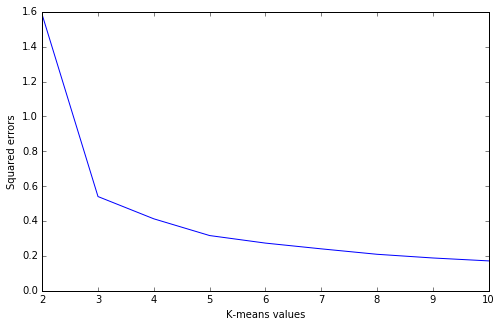

In [5]:
# Plot of k-means values and squared errors
plt.figure(figsize=(8,5))
plt.plot(k_values, k_errors)
plt.xlabel('K-means values')
plt.ylabel('Squared errors')
plt.show()

Based on this plot the K should be 3, as the errors decrease drastically from K=2 to K=3 and the errors do not decrease that much for the rest of the k values.

**And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point.**

As we add more means the errors decrease because we are adding more and more clusters until we get to the point where every coordinate has its own unique cluster to belong to. Resulting in fewer and fewer errors and when the clusters are the same number as coordinates the error will be 0.